# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'676cc875312fa83681b3913d730be646'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities[3]

607

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[1]

# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url +"appid=" + api_key + "&q=" + city+"&units="+units
#query_url = f"{url}appid={api_key}&units={units}&q="

print(query_url)

# Get weather data
response = requests.get(query_url)
response_json = response.json()
print(response.status_code)
print(response.url)
s_cities = []
for x in range(0,25):
    s_cities.append(cities[x])
    


#s_cities

http://api.openweathermap.org/data/2.5/weather?appid=676cc875312fa83681b3913d730be646&q=vossevangen&units=imperial
200
http://api.openweathermap.org/data/2.5/weather?appid=676cc875312fa83681b3913d730be646&q=vossevangen&units=imperial


In [4]:



ct = 0
ct1 = 0
loop_query_url = []
loop_response =[]
names_loop_list = []
temp_loop = []
hum_loop =[]
cloud_loop =[]
wind_loop = []
lat_loop = []
long_loop = []
for name in cities:
    loop_query_url.append(url +"appid=" + api_key + "&q="+ name+"&units=imperial")
    loop_response.append(requests.get(loop_query_url[ct]).json())
    try:
        names_loop_list.append(loop_response[ct]['name'])
        temp_loop.append(loop_response[ct]['main']['temp'])
        hum_loop.append(loop_response[ct]['main']['humidity'])
        cloud_loop.append(loop_response[ct]['clouds']['all'])
        wind_loop.append(loop_response[ct]['wind']['speed'])
        lat_loop.append(loop_response[ct]['coord']['lat'])
        long_loop.append(loop_response[ct]['coord']['lon'])
        ct = ct + 1
    except KeyError:
        ct1 = ct1 + 1
        ct = ct + 1
    
    

In [5]:
len(wind_loop)

545

In [6]:
data = {
    "Names": names_loop_list,
    "Tempature":temp_loop,
    "Humidity(%)": hum_loop,
    "Cloudiness(%)":cloud_loop,
    "Wind Speed (mph)":wind_loop,
    "Latitude":lat_loop,
    "Longitude":long_loop
}
df = pd.DataFrame(data)
df.head()
len(df)

545

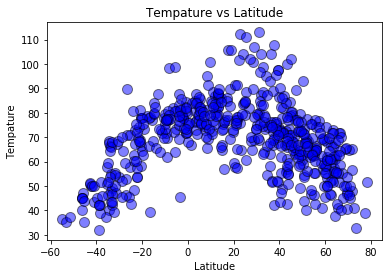

In [7]:
#bubble_df.plot.scatter(x = 'Rides Per City',y = 'Average Fare')
#color_list = ["Gold", "SkyBlue", "Coral"]
plt.scatter(df["Latitude"], df["Tempature"], marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.5,c="b")

plt.title("Tempature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Tempature")
aaa = []


#x,y = bubdf["Rides Per City"], bubdf["City Fare"]
#for i,txt in enumerate(bubdf["City"]):
#    plt.annotate(txt, (x[i], y[i]))


In [8]:
# We can tell from the graph that the cities near the 
# equator are hotter than the cities away from the equator
#
#

Text(0, 0.5, 'Humidity')

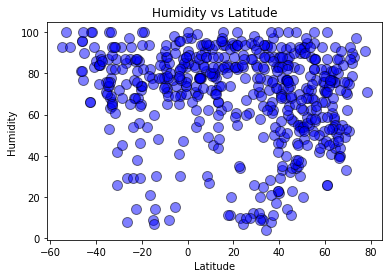

In [9]:
plt.scatter(df["Latitude"], df["Humidity(%)"], marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.5,c="b")

plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

In [10]:
# We can tell from this graph that the latitude of a city is 
# indepandant from the humidity of the city
#
#

Text(0, 0.5, 'Cloudiness(%)')

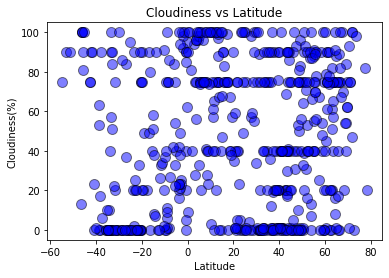

In [11]:
plt.scatter(df["Latitude"], df["Cloudiness(%)"], marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.5,c="b")

plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

In [12]:
# We can tell from this graph that the latitude of a city is 
# indepandant from the cloudiness of the city
#
#

Text(0, 0.5, 'Wind Speed (mph)')

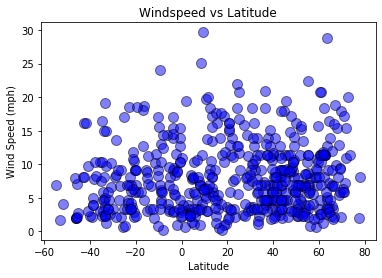

In [13]:
plt.scatter(df["Latitude"], df["Wind Speed (mph)"], marker="o", facecolors="red", edgecolors="black",
            s=100, alpha=0.5,c="b")

plt.title("Windspeed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

In [14]:
# We can tell from this graph that the latitude of a city is 
# indepandant from the windspeed of the city
#
#

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[2]

# Build query URL
query_url = url +"appid=" + api_key + "&q=" + city

print(query_url)

# Get weather data
response = requests.get(query_url)
response_json = response.json()
print(response.status_code)
print(response.url)

pprint(response_json)

http://api.openweathermap.org/data/2.5/weather?appid=676cc875312fa83681b3913d730be646&q=hamilton
200
http://api.openweathermap.org/data/2.5/weather?appid=676cc875312fa83681b3913d730be646&q=hamilton
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.26, 'lon': -79.87},
 'dt': 1562676157,
 'id': 5969785,
 'main': {'humidity': 77,
          'pressure': 1020,
          'temp': 292.11,
          'temp_max': 294.26,
          'temp_min': 289.82},
 'name': 'Hamilton',
 'sys': {'country': 'CA',
         'id': 818,
         'message': 0.0092,
         'sunrise': 1562665678,
         'sunset': 1562720458,
         'type': 1},
 'timezone': -14400,
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 2.1}}
